In [ ]:
import pandas as pd
import numpy as np

#Read Data

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/mushroom edibility classification dataset.csv')
dataset = dataset.drop(columns=['Unnamed: 0'])
print(dataset)

          class  cap-shape  cap-surface  ...  spore-print-color population  habitat
0     poisonous        5.0            2  ...                  2          3        5
1        edible        5.0            2  ...                  3          2        1
2        edible        0.0            2  ...                  3          2        3
3     poisonous        5.0            3  ...                  2          3        5
4        edible        5.0            2  ...                  3          0        1
...         ...        ...          ...  ...                ...        ...      ...
3119  poisonous        5.0            0  ...                  3          4        0
3120     edible        2.0            0  ...                  2          5        0
3121     edible        2.0            3  ...                  3          5        0
3122  poisonous        5.0            0  ...                  1          5        0
3123     edible        5.0            3  ...                  2          4  

#Handle Missing Value

In [ ]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

for x in dataset.columns:
  if dataset[x].isnull().sum() > 0:
    impute.fit(dataset[[x]])
    dataset[x] = impute.transform(dataset[[x]])


# Encode Categorical Features

In [ ]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

for x in dataset.columns:
  if dataset[x].dtype == np.object:
    dataset[x] = enc.fit_transform(dataset[x])

#Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

labels = dataset['class']
data = dataset.loc[:, dataset.columns != 'class']

data = sc.fit_transform(data)

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.2, random_state=9598)

# Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC()

svc.fit(data_train, labels_train)

prediction = svc.predict(data_test)

acc_svc = accuracy_score(labels_test, prediction)
print('Accuracy: ' + str(acc_svc))

Accuracy: 1.0


# MLP Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()

mlp.fit(data_train, labels_train)

prediction = mlp.predict(data_test)

acc_mlp = accuracy_score(labels_test, prediction)
print('Accuracy: ' + str(acc_mlp))


Accuracy: 1.0


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(data_train, labels_train)

prediction = rfc.predict(data_test)

acc_rfc = accuracy_score(labels_test, prediction)
print('Accuracy: ' + str(acc_rfc))

Accuracy: 1.0


# Apply PCA

In [ ]:
from sklearn.decomposition import PCA

num_of_columns = data_train.shape[1]

pca = PCA(n_components=int(num_of_columns/2))

pca.fit(data_train)

data_train = pca.transform(data_train)
data_test = pca.transform(data_test)

# Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC()

svc.fit(data_train, labels_train)

prediction = svc.predict(data_test)

acc_svc_pca = accuracy_score(labels_test, prediction)
print('Accuracy: ' + str(acc_svc_pca))

Accuracy: 1.0


# MLP Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()

mlp.fit(data_train, labels_train)

prediction = mlp.predict(data_test)

acc_mlp_pca = accuracy_score(labels_test, prediction)
print('Accuracy: ' + str(acc_mlp_pca))


Accuracy: 1.0


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(data_train, labels_train)

prediction = rfc.predict(data_test)

acc_rfc_pca = accuracy_score(labels_test, prediction)
print('Accuracy: ' + str(acc_rfc_pca))

Accuracy: 1.0


# Bar Plot

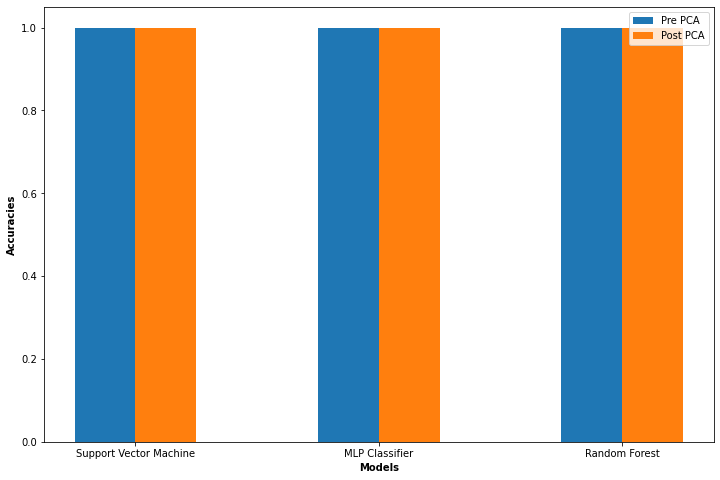

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

fig = plt.subplots(figsize =(12, 8))

models = ['Support Vector Machine', 'MLP Classifier', 'Random Forest']

pre_pca_accuracies = [acc_svc, acc_mlp, acc_rfc]
post_pca_accuracies = [acc_svc_pca, acc_mlp_pca, acc_rfc_pca]

plt.bar([2, 6, 10], pre_pca_accuracies, width=1, label='Pre PCA')
plt.bar([3, 7, 11], post_pca_accuracies, width=1, label='Post PCA')
plt.xlabel('Models', fontweight ='bold')
plt.ylabel('Accuracies', fontweight ='bold')

plt.xticks([2.5, 6.5, 10.5], models)
plt.legend()
plt.show()